In [13]:
#!pip install wordcloud
#!pip install spacy
#!pip install gensim


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer
# spacy for lemmatization
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import re

from pylab import rcParams

ModuleNotFoundError: No module named 'gensim'

In [5]:
''' 


import scipy

import tensorflow as tf
import tensorflow_hub as hub

from sklearn.mixture import GaussianMixture
from sklearn.cluster import OPTICS, AgglomerativeClustering, SpectralClustering

from sklearn import metrics






import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer


import flair



# NLTK Stop words
import nltk; nltk.download('stopwords')
import nltk
nltk.download('stopwords')

'''

" \n\n\nimport scipy\n\nimport tensorflow as tf\nimport tensorflow_hub as hub\n\nfrom sklearn.mixture import GaussianMixture\nfrom sklearn.cluster import OPTICS, AgglomerativeClustering, SpectralClustering\n\nfrom sklearn import metrics\n\n\n\n\n\n\nimport nltk\nnltk.download('vader_lexicon')\n\nfrom nltk.sentiment.vader import SentimentIntensityAnalyzer\n\n\nimport flair\n\n\n\n# NLTK Stop words\nimport nltk; nltk.download('stopwords')\nimport nltk\nnltk.download('stopwords')\n\n"

In [6]:
#NLP Functions

def tokeniser(text):
    #  "nlp" Object is used to create documents with linguistic annotations.
    my_doc = nlp(text)

    # Create list of word tokens
    token_list = gensim.utils.simple_preprocess(text, deacc=True)

    return token_list

def remove_stop_words(token_list):
    # Create list of word tokens after removing stopwords
    filtered_text =[] 

    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_text.append(word) 
    return filtered_text 

def list_unique_words_as_df(text_per_person,names,i):
    df = pd.DataFrame(text_per_person[names[i]],columns =['name'])
    words = df.name.unique().tolist()
    return pd.DataFrame(words,columns =['name'])


def show_wordcloud(data,nwords, title = None):
    wordcloud = WordCloud(
        background_color='white',
        #stopwords=stopwords,
        max_words=nwords,
        max_font_size=50, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
    
def prepare_nlp_text(df,name,text_per_person,common_words_provided=False):
    '''
    This function runs the NLP prep steps for each wordcloud
    
    '''
    #concat list
    text = ' '.join(df['text'].astype(str)[df['name'] == name])
    #Use RegEx to remove stnadardise text
    text = re.sub(r'[^A-Z a-z0-9]+', '', text).lower()
    #Tokenise the text
    token_list = tokeniser(text)
    #remove stopwords (based on a provided list) - round 1
    filtered_list = remove_stop_words(token_list)
    #stem words
    stemm_list = []
    for j in token_list:
        stemm_list.append(ps.stem(j))
    #remove stopwords (based on a provided list) - round 2
    if common_words_provided == True:
        filtered_list = [word for word in filtered_list if word.lower() not in common_words]
        filter_text = ' '.join(filtered_list)
        text_per_person[name] = filter_text
    else:
        text_per_person[name] = filtered_list #Use only for deffining common words
 
    return text_per_person

def produce_list_of_common_words(text_per_person,names,df):
    '''
    This function finds the unique words for each person
    Builds these into a number of dataframes
    carries out an inner join across the entire set to find only those words unique to everyperson
    stores these as a list
    '''
    df_1 = list_unique_words_as_df(text_per_person,names,0)
    df_2 = list_unique_words_as_df(text_per_person,names,1)
    df_3 = list_unique_words_as_df(text_per_person,names,2)
    df_4 = list_unique_words_as_df(text_per_person,names,3)
    df_5 = list_unique_words_as_df(text_per_person,names,4)
    df_6 = list_unique_words_as_df(text_per_person,names,5)
    df_7 = list_unique_words_as_df(text_per_person,names,6)
    df_8 = list_unique_words_as_df(text_per_person,names,7)
    df_9 = list_unique_words_as_df(text_per_person,names,8)
    df_10 =list_unique_words_as_df(text_per_person,names,9)

    print(len(df_1))
    df_agg = df_1.merge(df_2, how='inner',left_on='name', right_on='name')
    print(len(df_agg))
    df_agg = df_agg.merge(df_3, how='inner',left_on='name', right_on='name')
    print(len(df_agg))
    df_agg = df_agg.merge(df_4, how='inner',left_on='name', right_on='name')
    print(len(df_agg))
    df_agg = df_agg.merge(df_5, how='inner',left_on='name', right_on='name')
    print(len(df_agg))
    df_agg = df_agg.merge(df_6, how='inner',left_on='name', right_on='name')
    print(len(df_agg))
    df_agg = df_agg.merge(df_7, how='inner',left_on='name', right_on='name')
    print(len(df_agg))
    df_agg = df_agg.merge(df_8, how='inner',left_on='name', right_on='name')
    print(len(df_agg))
    df_agg = df_agg.merge(df_9, how='inner',left_on='name', right_on='name')
    print(len(df_agg))
    df_agg = df_agg.merge(df_10, how='inner',left_on='name', right_on='name')
    print(len(df_agg))

    common_words = df_agg['name'].tolist()
    
    common_names = ['damian','stefan','paul','dave','phil','rob','jack','sam','james','hamish','verity','zac','holly']
    
    common_words.remove(common_names)
    
    media = ['mediashared']
    common_words=common_words+media#+common_names
    
    return common_words

def CountFrequency(my_list,printing=False): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
  
    if printing==True:       
        for key, value in freq.items(): 
                print ("{} : {}".format(key, value)) 
    return freq

In [7]:
#LOAD PREPARED DATA
df=pd.read_csv('data/PREP_combo_thread_data_1804202.csv')
df.head()

,Unnamed: 0,date,time,text,name
0,1,29/03/2018,09:00,hebiiiiib,DaveY
1,2,29/03/2018,09:01,hibeb,JackG
2,3,29/03/2018,09:01,let's just see. we need paul to make a clean ...,DaveY
3,4,29/03/2018,09:10,yeah - the big de-teather,DaveY
4,5,29/03/2018,09:11,electing trump doesn't sit with froust neutra...,DaveY


In [8]:
#Prepare stemming objects
ps = PorterStemmer()

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

#Word Cloud specific prep
redacted_df = df.drop(df[df['text'] == ' MediaShared'].index)
redacted_df = redacted_df.drop(redacted_df[redacted_df['text'] == ' DeletedMsg'].index)
redacted_df = redacted_df.drop(redacted_df[redacted_df['text'] == ' Deleted Message'].index)

In [9]:
#Calculate word clouds per person

text_per_person = {}

names = df['name'].unique()

for i in names:
    text_per_person = prepare_nlp_text(redacted_df,i,text_per_person)

common_words = produce_list_of_common_words(text_per_person,names,redacted_df)

text_per_person = {}

for i in names:
    filtered_text_per_person = prepare_nlp_text(redacted_df,i,text_per_person,common_words_provided=True)

#for i in text_per_person.keys():
#    show_wordcloud(filtered_text_per_person[i],30, title = i)

NameError: name 'gensim' is not defined

In [ ]:
import pickle
with open("data/common_words.txt", 'wb') as fp:
    pickle.dump(common_words, fp)

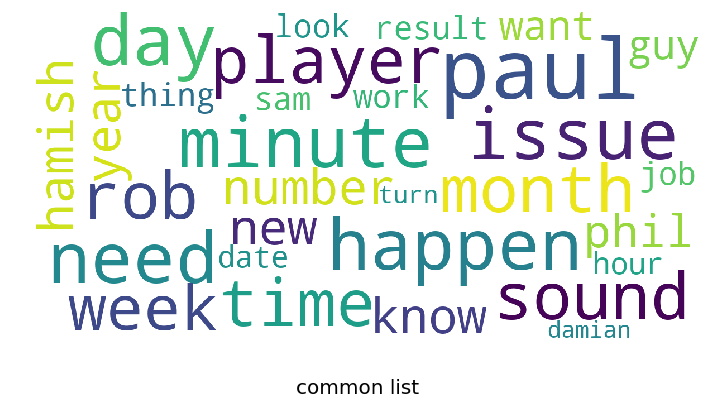

In [8]:
common_list = ' '.join(common_words)

show_wordcloud(common_list,30, title = 'common list')

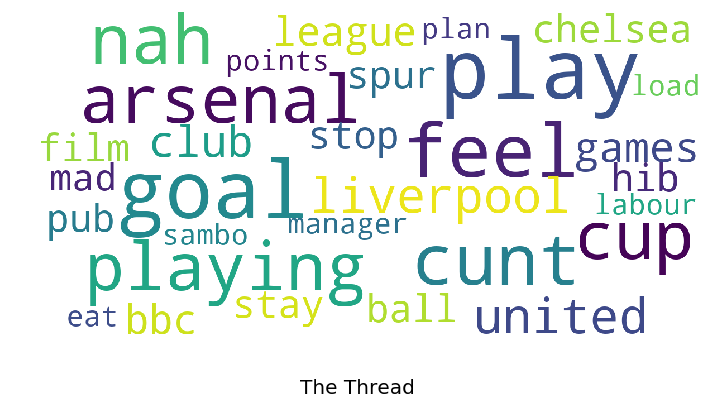

In [9]:
the_thread = ' '.join(filtered_text_per_person.values())  

show_wordcloud(the_thread,30, title = 'The Thread')

In [10]:
#count the frequnecy of words in the thread
the_thread_list = tokeniser(the_thread)

thread_freq_dict = CountFrequency(the_thread_list)   

In [11]:
thread_freq_dict

{'hebiiiiib': 2,
 'lets': 67,
 'clean': 54,
 'break': 77,
 'deteather': 1,
 'electing': 2,
 'neutrality': 4,
 'policies': 5,
 'add': 68,
 'boozehound': 3,
 'emoji': 6,
 'tab': 8,
 'stronger': 12,
 'benefits': 12,
 'gifs': 12,
 'stored': 4,
 'laptop': 20,
 'pc': 6,
 'simple': 24,
 'thrust': 3,
 'gently': 2,
 'gentle': 3,
 'dylan': 11,
 'thomas': 11,
 'innout': 1,
 'burger': 19,
 'possible': 82,
 'menu': 15,
 'items': 9,
 'loving': 71,
 'bacon': 28,
 'shite': 56,
 'memo': 6,
 'fire': 64,
 'nuke': 4,
 'hollywood': 9,
 'films': 35,
 'join': 36,
 'feminist': 4,
 'support': 56,
 'network': 8,
 'caring': 12,
 'unfortunate': 14,
 'neighbours': 12,
 'cunt': 187,
 'ronaldo': 61,
 'ball': 212,
 'haha': 123,
 'subtle': 7,
 'probing': 1,
 'questions': 28,
 'instantly': 43,
 'invented': 13,
 'pseudonym': 1,
 'bullying': 5,
 'unable': 17,
 'breath': 12,
 'regaining': 1,
 'lung': 3,
 'capacity': 16,
 'hoot': 33,
 'sculpture': 5,
 'masterpiece': 7,
 'rancid': 13,
 'everyones': 38,
 'blinded': 3,
 'roya

In [13]:

rcParams['figure.figsize'] = 10, 5

sorted_thread_freq_dict = dict(sorted(thread_freq_dict.items(), key=operator.itemgetter(1),reverse=True))

limit = 30

keys = list(sorted_thread_freq_dict.keys())
values = list(sorted_thread_freq_dict.values())

sorted_thread_freq_dict_limit = {}

for i in np.arange(0,limit):
    sorted_thread_freq_dict_limit[keys[i]] = values[i]

plt.bar(*zip(*sorted_thread_freq_dict_limit.items()))
plt.xticks(rotation=90)
plt.xlabel('words')
plt.ylabel('count')
plt.title('the thread word popularity')

plt.ylim([100,400])

plt.show()

NameError: name 'operator' is not defined

In [14]:
common_words

['need',
 'paul',
 'yeah',
 'big',
 'trump',
 'doesnt',
 'sit',
 'froust',
 'managed',
 'think',
 'based',
 'phone',
 'numbers',
 'lot',
 'ill',
 'post',
 'classic',
 'good',
 'night',
 'thats',
 'theyve',
 'gone',
 'long',
 'quality',
 'choice',
 'havent',
 'got',
 'cant',
 'like',
 'ah',
 'football',
 'dont',
 'issue',
 'youd',
 'shit',
 'hours',
 'happen',
 'love',
 'went',
 'line',
 'realise',
 'happened',
 'lol',
 'school',
 'avoid',
 'oh',
 'god',
 'minutes',
 'maybe',
 'actually',
 'looks',
 'great',
 'th',
 'start',
 'day',
 'hes',
 'able',
 'run',
 'straight',
 'minute',
 'wouldnt',
 'doubt',
 'literally',
 'true',
 'fine',
 'player',
 'game',
 'rules',
 'wales',
 'sound',
 'chippy',
 'weekend',
 'month',
 'june',
 'couple',
 'months',
 'im',
 'getting',
 'paying',
 'looking',
 'rob',
 'win',
 'chance',
 'intense',
 'end',
 'definitely',
 'david',
 'vote',
 'wasnt',
 'people',
 'party',
 'moving',
 'away',
 'team',
 'mid',
 'season',
 'life',
 'old',
 'read',
 'radio',
 'going